## Khám phá dữ liệu

## Mục lục
- [I. Tổng quan dữ liệu và tóm tắt vấn dề](#i)
- [II. Tiền xử lí cơ bản](#ii)
    - [1. Loại bỏ các dòng có job name là not specified](#ii1)
    - [2. Loại các bài tuyển dụng đăng lại nhiều lần](#ii2)
    - [3. Kiểm tra và xử lý dữ liệu null](#ii3)
    - [4. Chuyển các cột thành các kiểu dữ liệu phù hợp](#ii4)
    - [5. Đưa các cột cần thiết về  kiểu category](#ii5)
    - [6. Loại bỏ các cột không có giá trị trực quan](#ii6)
- [III. Tiền xử lí chuyên sâu](#iii)
    - [1. Xử lý cột Location](#iii1)
    - [2. Xử lý cột Experience](#iii2)
    - [3. Xử lý cột Salary](#iii3)
- [IV. Dịch các cột cần thiết sang tiếng Anh và tách ra thành danh sách](#iv)
    - [1. Chuyển cột Employment type sang tiếng anh](#iv1)
    - [2. Xử lý cột Industry](#iv2)
    - [3. Xử lý cột Welfare](#iv3)
    - [4. Xử lý cột Job Requirements](#iv4)
- [V. Tối ưu dữ liệu để trực quan](#v)
    - [1. Kiểm tra dữ liệu mang giá trị Not specified](#v1)
- [VI. Lưu dữ liệu](#vi)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import numpy as np
from sklearn.linear_model import LinearRegression

Xóa các dòng link bị trùng trong file job_links.txt

In [2]:
'''
# Đọc link từ file job_links2.txt, nếu khác các link trong job_links.txt thì thêm vào job_links3.txt
with open('../CollectingData/job_links2.txt', 'r') as f:
    job_links2 = f.read().splitlines()
with open('../CollectingData/job_links.txt', 'r') as f:
    job_links = f.read().splitlines()
with open('../CollectingData/job_links3.txt', 'r') as f:
    job_links3 = f.read().splitlines()
for link in job_links2:
    if link not in job_links:
        job_links3.append(link)
with open('../CollectingData/job_links3.txt', 'w') as f:
    for link in job_links3:
        f.write(link + '\n')
'''

"\n# Đọc link từ file job_links2.txt, nếu khác các link trong job_links.txt thì thêm vào job_links3.txt\nwith open('../CollectingData/job_links2.txt', 'r') as f:\n    job_links2 = f.read().splitlines()\nwith open('../CollectingData/job_links.txt', 'r') as f:\n    job_links = f.read().splitlines()\nwith open('../CollectingData/job_links3.txt', 'r') as f:\n    job_links3 = f.read().splitlines()\nfor link in job_links2:\n    if link not in job_links:\n        job_links3.append(link)\nwith open('../CollectingData/job_links3.txt', 'w') as f:\n    for link in job_links3:\n        f.write(link + '\n')\n"

Lấy thêm các link mới cập nhật trên trang careerviet

In [3]:
'''
# Đếm số dòng trong file job_links.txt
with open('../dataset/job_links.txt', 'r') as f:
    job_links = f.readlines()
print(len(job_links))

# Đọc file job_links.txt và xóa các dòng link bị trùng lặp
with open('../dataset/job_links.txt', 'r') as f:
    job_links = f.readlines()
job_links = list(set(job_links))

# Ghi lại vào file job_links.txt
with open('../dataset/job_links.txt', 'w') as f:
    for job_link in job_links:
        f.write(job_link)

print(len(job_links))
'''

"\n# Đếm số dòng trong file job_links.txt\nwith open('../dataset/job_links.txt', 'r') as f:\n    job_links = f.readlines()\nprint(len(job_links))\n\n# Đọc file job_links.txt và xóa các dòng link bị trùng lặp\nwith open('../dataset/job_links.txt', 'r') as f:\n    job_links = f.readlines()\njob_links = list(set(job_links))\n\n# Ghi lại vào file job_links.txt\nwith open('../dataset/job_links.txt', 'w') as f:\n    for job_link in job_links:\n        f.write(job_link)\n\nprint(len(job_links))\n"

## I. Tổng quan dữ liệu và tóm tắt vấn dề <a id="i"></a>

Có tất cả x dòng và y cột.

Mỗi dòng đại diện cho 1 mẫu dữ liệu.
| Cột               | Mô tả                                                         | Vấn đề                              |
|-------------------|---------------------------------------------------------------|-------------------------------------|
| Job Name          | Tên công việc                                                 |                                     |
| Job Link          | Đường dẫn của job                                             |Xóa lặp dựa trên Link của job        |
| Location          | Địa điểm                                                      |                                     |
| Update Date       | Ngày up CV                                                    |Chuyển về Datetime                   |
| Deadline          | Hạn nộp CV                                                    |Chuyển về Datetime                   |
| Experience        | Kinh nghiệm                                                   |Chỉ lấy phần số bên trái (min)       |
| Job Level         | Cấp bậc                                                       |Loại bỏ dữ liệu trống (Not specific) |
| Industry          | Loại ngành nghề                                               |Đã xử lí                             |
| Employment Type   | Hình thức làm việc                                            |Chia thành n cột                     |
| Welfare           | Phúc lợi                                                      |Chia thành m cột                     |
| Job Description   | Mô tả công việc                                               |Gộp                                  |
| Job Requirement   | Yêu cầu công việc                                             |Gộp                                  |
| Other Information | Thông tin khác                                                |Gộp                                  |
| Job Tags          | Job Tags                                                      |                                     |
| Company URL       | Đường dẫn đến trang công ty                                   |                                     |
| Company Name      | Tên công ty                                                   |                                     |
| Company Address   | Địa điểm của công ty                                          |                                     |
| Company Scale     | Quy mô của công ty                                            |Chia thành 2 cột (min và max)        |
| Company Type      | Loại hình hoạt động                                           |Xóa các dòng bị lỗi dấu              |
| Company Website   | Website của công ty                                           |                                     |
| Followers         | Số lượng người theo dõi                                       |Chuyển về dạng số nguyên             |
| Company Intro     | Phần giới thiệu của công ty                                   |                                     |
| Salary            | Lương                                                         |Đã xử lí                             |

In [4]:
# Đọc file csv
data = pd.read_csv('../dataset/job_data_new.csv')
data.head()

,Job Name,Job Link,Location,Update Date,Deadline,Experience,Job Level,Industry,Employment Type,Welfare,...,Job Tags,Company URL,Salary,Company Name,Company Address,Company Scale,Company Type,Company Website,Follower,Company Introduction
0,Sales Manager,https://careerviet.vn/vi/tim-viec-lam/sales-ma...,Hồ Chí Minh,25/10/2024,23/11/2024,3 - 5 \n ...,Quản lý,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Phụ cấp, Đồng phục, Chế độ th...",...,"Giám đốc kinh doanh, Sales Director, Giám đốc ...",Not Found,Cạnh tranh,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,[GẤP] Nhân viên Sales Tiếng Trung / Chinese Sa...,https://careerviet.vn/vi/tim-viec-lam/gap-nhan...,Hồ Chí Minh,23/11/2024,17/12/2024,Not specified,Nhân viên,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Phụ cấp, Xe đưa đón, Đồng phụ...",...,"sales tiếng trung, chinese sales staff, chines...",Not Found,Cạnh tranh,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Not specified,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Not specified,Not specified,Not specified,Not specified,Not specified,Not Found,Not specified,"Chế độ bảo hiểm, Phụ cấp, Xe đưa đón, Đào tạo,...",...,"kỹ sư bảo trì, chuyên viên bảo trì, maintenanc...",Not Found,Not specified,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Warehouse Supervisor,https://careerviet.vn/vi/tim-viec-lam/warehous...,Bình Định,25/10/2024,23/11/2024,2 - 5 \n ...,Trưởng nhóm / Giám sát,\n ...,Nhân viên chính thức,"Laptop, Chế độ bảo hiểm, Du Lịch, Phụ cấp, Xe ...",...,Giám sát kho,https://careerviet.vn/vi/nha-tuyen-dung/cong-t...,Cạnh tranh,CÔNG TY TNHH WGR INDUSTRIES,"Lô A8, KCN Becamex Bình Định, Khu kinh tế Nhơn...",Not specified,Trách nhiệm hữu hạn,Not specified,169,"WGR Industries Co., Ltd(FACTORY MANUFACTURING ..."
4,Nhân viên Môi giới,https://careerviet.vn/vi/tim-viec-lam/nhan-vie...,Hà Nội,25/10/2024,23/11/2024,Trên 1 \n ...,Nhân viên,\n ...,Nhân viên chính thức,"Chế độ bảo hiểm, Du Lịch, Chế độ thưởng, Chăm ...",...,"Giao dịch viên, Teller, Chuyên viên đối ngoại,...",https://careerviet.vn/vi/nha-tuyen-dung/cong-t...,Cạnh tranh,Công ty Cổ phần Chứng khoán Dầu khí (PSI),"Số 18 Lý Thường Kiệt, Quận Hoàn Kiếm, Hà Nội",100-499,Cổ phần,https://www.psi.vn/vi,2.27,PSI là Công ty chứng khoán thuộc Tập đoàn Dầu ...


## II. Tiền xử lí cơ bản <a id="ii"></a>

### Loại bỏ các dòng có job name là not specified <a id="ii1"></a>

In [5]:
print(data.shape[0])

# Bỏ các dòng có Job Name là Not specified
data = data[data['Job Name'] != 'Not specified']

print(data.shape[0])

26361
25636


### Loại các bài tuyển dụng đăng lại nhiều lần <a id="ii2"></a>

In [6]:
data = data.drop_duplicates()
data = data.drop_duplicates(subset=['Job Description','Job Level','Company Name','Location'], keep='first') # Some company create the same after few day and change a bit 
data.shape

(20020, 23)

### Kiểm tra và xử lý dữ liệu null <a id="ii3"></a>

<Axes: >

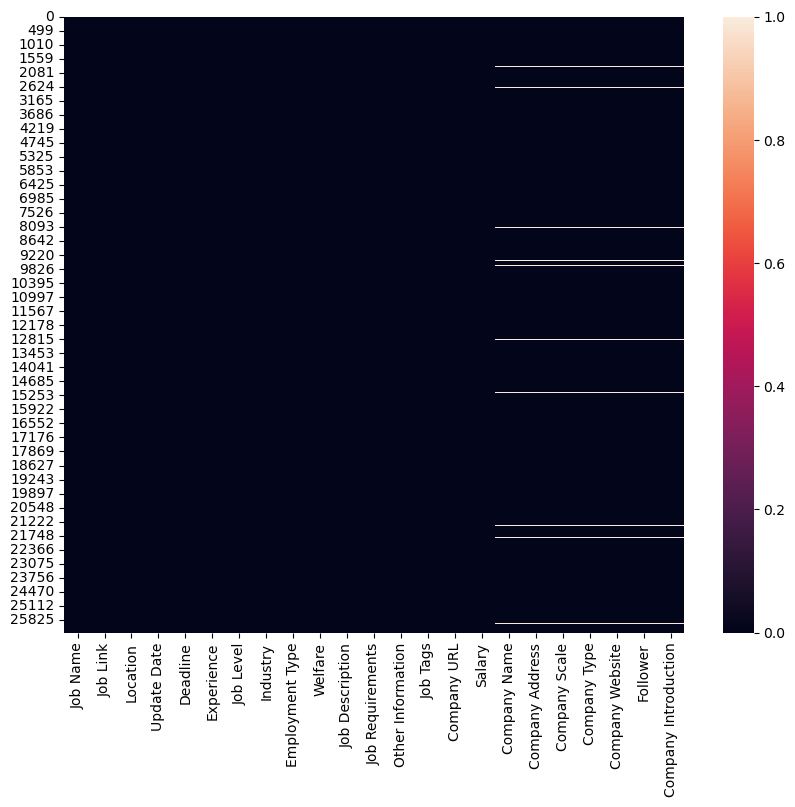

In [7]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.isnull())

In [8]:
# Xóa dòng có giá trị null
data = data.dropna()

19749


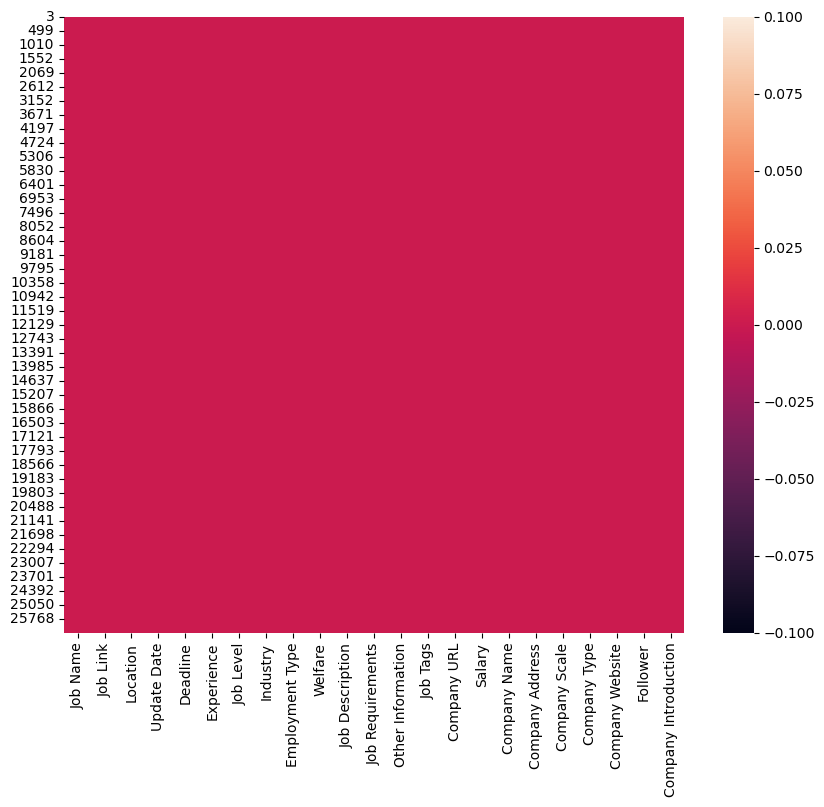

In [9]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.isnull())
print(data.shape[0])

### Chuyển các cột thành các kiểu dữ liệu phù hợp <a id="ii4"></a>


| Cột               | Kiểu dữ liệu      |
|-------------------|-------------------|
| Location          | object            |
| Experience        | int64             |
| Job Level         | object            |
| Industry          | object            |
| Employment Type   | object            |
| Welfare           | object            |
| Job Requirements  | object            |
| Salary            | object            |
| Company Name      | object            |
| Company Type      | object            |
| Update Date       | datetime64[ns]    |
| Deadline          | datetime64[ns]    |
| Update Date_day   | int32             |
| Update Date_month | int32             |
| Update Date_year  | int32             |
| Deadline_day      | int32             |
| Deadline_month    | int32             |
| Deadline_year     | int32             |

In [10]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 19749 entries, 3 to 26359
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Job Name              19749 non-null  object
 1   Job Link              19749 non-null  object
 2   Location              19749 non-null  object
 3   Update Date           19749 non-null  object
 4   Deadline              19749 non-null  object
 5   Experience            19749 non-null  object
 6   Job Level             19749 non-null  object
 7   Industry              19749 non-null  object
 8   Employment Type       19749 non-null  object
 9   Welfare               19749 non-null  object
 10  Job Description       19749 non-null  object
 11  Job Requirements      19749 non-null  object
 12  Other Information     19749 non-null  object
 13  Job Tags              19749 non-null  object
 14  Company URL           19749 non-null  object
 15  Salary                19749 non-null  obj

Chuyển 2 cột Update Date và Deadline về dạng Datetime và tách thành các cột ngày, tháng, năm

In [11]:
# Bỏ các dòng mà cột Update Date hoặc Deadline có giá trị là Not specified
data = data[(data['Update Date'] != 'Not specified') & (data['Deadline'] != 'Not specified')]
data.shape

# Chuyển 2 cột Update Date và Deadline về dạng Datetime và tách thành các cột ngày, tháng, năm
data['Update Date'] = pd.to_datetime(data['Update Date'], dayfirst=True, errors='coerce')
data['Deadline'] = pd.to_datetime(data['Deadline'], dayfirst=True, errors='coerce')

data['Update Date_day'] = data['Update Date'].dt.day
data['Update Date_month'] = data['Update Date'].dt.month
data['Update Date_year'] = data['Update Date'].dt.year

data['Deadline_day'] = data['Deadline'].dt.day
data['Deadline_month'] = data['Deadline'].dt.month
data['Deadline_year'] = data['Deadline'].dt.year

### Đưa các cột cần thiết về  kiểu category <a id="ii5"></a>

### Loại bỏ các cột không có giá trị trực quan <a id="ii6"></a>

## III. Tiền xử lí chuyên sâu <a id="iii"></a>

In [12]:
# Thư viện cần thiết
# from Trans_Tokenize import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
# from sklearn.model_selection import train_test_split
# import math
import unicodedata
# import swifter
# import nltk
# from concurrent.futures import ThreadPoolExecutor
# nltk.download('stopwords')

### Xử lý cột Location <a id="iii1"></a>

Chỉ lấy địa điểm ở đầu một chuỗi ở mỗi dòng của cột Location, vì đây là nơi đầu não công ty tọa lạc

In [13]:
def remove_diacritics(text):
    return ''.join(
        c for c in unicodedata.normalize('NFD', text)
        if unicodedata.category(c) != 'Mn'
    )

In [14]:
data['Location'] = data['Location'].apply(lambda x: x.title())

data['Location'] = data['Location'].apply(lambda x: x.split(',')[0].strip() if ',' in x else x.strip())
data['Location'] = data['Location'].apply(remove_diacritics)

data = data[~data['Location'].isin(['Not Specified', 'Not Found'])]

### Xử lý cột Experience <a id="iii2"></a>

Lấy giá trị bên trái của mẫu dữ liệu

VD: 3-5 năm thì lấy 3

In [15]:
def extract_number(value):
    if 'Chưa có kinh nghiệm' in value:
        return 0  # Nếu "Chưa có kinh nghiệm" trả về 0
    elif match := re.match(r'(\d+)\s*-\s*\d+', value):  # Nếu định dạng là number - number
        return int(match.group(1))  # Lấy số đầu tiên
    elif match := re.search(r'\d+', value):  # Nếu chỉ có một số duy nhất
        return int(match.group(0))  # Lấy số đó
    return 0

In [16]:
data["Experience"]=data["Experience"].str.replace("\n","",regex=True)
data["Experience"]=data["Experience"].str.replace("Năm","",regex=True)
data["Experience"]=data["Experience"].str.replace(r"\s+",' ',regex=True).str.strip()
data["Experience"]=data["Experience"].apply(extract_number)

### Xử lý cột Salary <a id="iii3"></a>

In [17]:
import re
import math

def extract_salary(value):
    # Loại bỏ dấu phẩy trong số (để xử lý 700,000 => 700000)
    value = value.replace(',', '')
    value = value.replace('.', '')
    
    # Tách các con số trong chuỗi
    numbers = re.findall(r'\d+', value)
    numbers = [int(num) for num in numbers]  # Chuyển các chuỗi số thành integer
    
    # Nếu có khoảng lương
    if len(numbers) > 1:
        # Nếu khoảng chênh lệch giữa hai giá trị quá lớn (ví dụ: 700 - 1,000 USD)
        if (numbers[1] - numbers[0]) / numbers[0] > 0.5:
            salary = numbers[0] + (numbers[1] - numbers[0]) / 4  # Đoán mức lương trung bình trong khoảng
        else:
            salary = sum(numbers) / len(numbers)  
    elif numbers:
        # Trường hợp chỉ có một số
        salary = sum(numbers) / len(numbers)
    else:
        return 'Cạnh tranh'
    
    # Kiểm tra các đơn vị tiền tệ và chuyển đổi
    if any(unit in value.lower() for unit in ['triệu', 'tr']):
        salary *= 1_000_000  
    elif any(unit in value.lower() for unit in ['usd', 'đô la', '$', 'đô']):
        salary *= 23_000  

    
    if any(unit in value.lower() for unit in ['năm', 'year']):
        salary /= 12  

    # Làm tròn kết quả về bội số gần nhất của 100,000
    return math.ceil(round(salary, -5))

In [18]:
data = data.copy()

data['Salary'] = data['Salary'].replace(
    ['0','Thỏa thuận', 'Negotiable', 'Not Specified', 'Not Found', 'not found', 'Not specifield'], 
    np.nan)
data['Salary'] = data['Salary'].apply(extract_salary)
data['Salary'].value_counts()

Salary
Cạnh tranh    8291
12500000      1030
17500000       767
13500000       507
11000000       473
              ... 
30200000         1
49200000         1
68800000         1
69000000         1
900000           1
Name: count, Length: 280, dtype: int64

## IV. Dịch các cột cần thiết sang tiếng Anh và tách ra thành danh sách <a id="iv"></a>

### Chuyển cột Employment type sang tiếng anh <a id="iv1"></a>

In [19]:
# Tạo từ điển translation_dict
translation_dict = {
    'Thực tập': 'Internship',
    'Bán thời gian': 'Part-time',
    'Nhân viên chính thức': 'Official',
    'Thời vụ/ Nghề tự do': 'Seasonal/Freelance ',
}

def translate_employment_type(text, translation_dict):
    for key, value in translation_dict.items():
        text = text.replace(key, value)
    return text

# Áp dụng hàm vào cột 'Employment Type'
data['Employment Type'] = data['Employment Type'].apply(lambda x: translate_employment_type(x, translation_dict))
data['Employment Type'].value_counts()

Employment Type
Official                                                18855
Internship                                                451
Part-time                                                 106
Seasonal/Freelance                                         72
Official, Part-time                                        62
Official, Internship                                       49
Part-time, Seasonal/Freelance                              35
Official, Seasonal/Freelance                               34
Part-time, Internship                                      27
Part-time, Seasonal/Freelance , Internship                 21
Official, Part-time, Seasonal/Freelance , Internship       15
Official, Part-time, Internship                             8
Official, Part-time, Seasonal/Freelance                     7
Official, Seasonal/Freelance , Internship                   4
Seasonal/Freelance , Internship                             3
Name: count, dtype: int64

### Xử lý cột Industry <a id="iv2"></a>

In [20]:
# Hàm tách các ngành trong chuỗi và trả về một danh sách
def extract_industries(text):
    industries = [industry.strip() for industry in text.split(',')]
    return industries

all_industries = data['Industry'].apply(extract_industries).explode()

# Đếm số lần xuất hiện của từng ngành
industry_counts = all_industries.value_counts()

# Lấy danh sách tên các ngành từ industry_counts
industry_names = industry_counts.index.tolist()

# In danh sách các ngành
print(industry_counts)
print(industry_names)

Industry
Bán hàng / Kinh doanh            6098
Ngân hàng                        2720
Tiếp thị / Marketing             2467
Bán lẻ / Bán sỉ                  2263
Tài chính / Đầu tư               1944
                                 ... 
Khoáng sản                         25
Phi chính phủ / Phi lợi nhuận      16
Lâm Nghiệp                         15
Thủy lợi                           15
Thư viện                           11
Name: count, Length: 68, dtype: int64
['Bán hàng / Kinh doanh', 'Ngân hàng', 'Tiếp thị / Marketing', 'Bán lẻ / Bán sỉ', 'Tài chính / Đầu tư', 'Kế toán / Kiểm toán', 'Dịch vụ khách hàng', 'Sản xuất / Vận hành sản xuất', 'Điện / Điện tử / Điện lạnh', 'Cơ khí / Ô tô / Tự động hóa', 'Xây dựng', 'Hành chính / Thư ký', 'Tư vấn', 'CNTT - Phần mềm', 'Nhân sự', 'Bất động sản', 'Giáo dục / Đào tạo', 'Vận chuyển / Giao nhận /  Kho vận', 'Quản lý điều hành', 'Y tế / Chăm sóc sức khỏe', 'Thực phẩm & Đồ uống', 'Tiếp thị trực tuyến', 'Quản lý chất lượng (QA/QC)', 'Bảo trì / Sửa chữ

Tạo từ điển ánh xạ các ngành sang tiếng Anh để gom nhóm cho dễ

In [21]:
industry_translation_dict = {
    'Bán hàng / Kinh doanh': 'sales_business',
    'Ngân hàng': 'banking',
    'Dịch vụ khách hàng': 'customer_service',
    'Tiếp thị / Marketing': 'marketing',
    'Bán lẻ / Bán sỉ': 'retail_wholesale',
    'Tài chính / Đầu tư': 'finance_investment',
    'Kế toán / Kiểm toán': 'accounting_auditing',
    'Điện / Điện tử / Điện lạnh': 'electricity_electronics_refrigeration',
    'Tư vấn': 'consulting',
    'Sản xuất / Vận hành sản xuất': 'manufacturing_operations',
    'Cơ khí / Ô tô / Tự động hóa': 'mechanical_automotive_automation',
    'Xây dựng': 'construction',
    'Hành chính / Thư ký': 'administrative_secretarial',
    'Giáo dục / Đào tạo': 'education_training',
    'CNTT - Phần mềm': 'it_software',
    'Bất động sản': 'real_estate',
    'Nhân sự': 'human_resources',
    'Quản lý điều hành': 'executive_management',
    'Y tế / Chăm sóc sức khỏe': 'healthcare_medical',
    'Vận chuyển / Giao nhận /  Kho vận': 'transportation_logistics_warehouse',
    'Thực phẩm & Đồ uống': 'food_beverages',
    'Dệt may / Da giày / Thời trang': 'textile_leather_fashion',
    'Bảo trì / Sửa chữa': 'maintenance_repair',
    'Quản lý chất lượng (QA/QC)': 'quality_management_qaqc',
    'Tiếp thị trực tuyến': 'online_marketing',
    'Xuất nhập khẩu': 'import_export',
    'Not Found': 'not_found',
    'Quảng cáo / Đối ngoại / Truyền Thông': 'advertising_public_relations_media',
    'Dược phẩm': 'pharmaceuticals',
    'Biên phiên dịch': 'translation_interpretation',
    'Nhà hàng / Khách sạn': 'restaurant_hotel',
    'Mỹ thuật / Nghệ thuật / Thiết kế': 'fine_arts_art_design',
    'Kiến trúc': 'architecture',
    'Luật / Pháp lý': 'law_legal',
    'Bảo hiểm': 'insurance',
    'Ngành khác': 'other_industries',
    'Thu mua / Vật tư': 'procurement_supplies',
    'CNTT - Phần cứng / Mạng': 'it_hardware_networking',
    'Bưu chính viễn thông': 'postal_telecommunications',
    'Nội ngoại thất': 'interior_exterior_design',
    'Mới tốt nghiệp / Thực tập': 'new_graduates_internship',
    'Du lịch': 'tourism',
    'Truyền hình / Báo chí / Biên tập': 'television_journalism_editing',
    'Hóa học': 'chemistry',
    'Lao động phổ thông': 'manual_labor',
    'Công nghệ thực phẩm / Dinh dưỡng': 'food_technology_nutrition',
    'Chứng khoán': 'securities',
    'Môi trường': 'environment',
    'Hàng gia dụng / Chăm sóc cá nhân': 'household_goods_personal_care',
    'Công nghệ sinh học': 'biotechnology',
    'An toàn lao động': 'occupational_safety',
    'Đồ gỗ': 'wooden_goods',
    'Tổ chức sự kiện': 'event_organization',
    'Nông nghiệp': 'agriculture',
    'Thống kê': 'statistics',
    'In ấn / Xuất bản': 'printing_publishing',
    'Giải trí': 'entertainment',
    'An Ninh / Bảo Vệ': 'security_protection',
    'Dầu khí': 'oil_gas',
    'Hàng không': 'aviation',
    'Hàng hải': 'maritime',
    'Chăn nuôi / Thú y': 'livestock_veterinary',
    'Thủy sản / Hải sản': 'aquaculture_seafood',
    'Trắc địa / Địa Chất': 'surveying_geology',
    'Khoáng sản': 'minerals',
    'Lâm Nghiệp': 'forestry',
    'Phi chính phủ / Phi lợi nhuận': 'ngo_non_profit',
    'Thủy lợi': 'irrigation',
    'Thư viện': 'library'
}

data['Industry'] = data['Industry'].apply(lambda x: translate_employment_type(x, industry_translation_dict))
data['Industry'].value_counts()

Industry
\n                                            accounting_auditing\n                                                                                                                                                                                                                                                                       433
\n                                            sales_business\n                                    , \n                                            banking\n                                    , \n                                            finance_investment\n                                                                       374
\n                                            marketing\n                                    , \n                                            retail_wholesale\n                                    , \n                                            sales_business\n                                                                

### Xử lý cột Welfare <a id="iv3"></a>

Dùng lại hàm phân tách trên cho cột Welfare vì tính chất dữ liệu của 2 cột Industry và Welfare là như nhau

In [22]:
all_welfares = data['Welfare'].apply(extract_industries).explode()
welfare_counts = all_welfares.value_counts()

# Lấy danh sách các phúc lợi từ welfare_counts
welfare_names = welfare_counts.index.tolist()

# In danh sách các ngành
print(welfare_counts)
print(welfare_names)

Welfare
Chế độ bảo hiểm       18504
Chế độ thưởng         18478
Đào tạo               18429
Tăng lương            17743
Chăm sóc sức khỏe     16074
Du Lịch               16041
Nghỉ phép năm         14335
Phụ cấp               12242
Đồng phục              8959
Công tác phí           8455
Laptop                 6590
Phụ cấp thâm niên      5423
CLB thể thao           3083
Du lịch nước ngoài     2151
Xe đưa đón             2132
Not specified           320
Name: count, dtype: int64
['Chế độ bảo hiểm', 'Chế độ thưởng', 'Đào tạo', 'Tăng lương', 'Chăm sóc sức khỏe', 'Du Lịch', 'Nghỉ phép năm', 'Phụ cấp', 'Đồng phục', 'Công tác phí', 'Laptop', 'Phụ cấp thâm niên', 'CLB thể thao', 'Du lịch nước ngoài', 'Xe đưa đón', 'Not specified']


Tạo từ điển ánh xạ các phúc lợi sang tiếng Anh để gom nhóm

In [23]:

welfare_translation_dict = {
    'Chế độ thưởng': 'bonus',
    'Chế độ bảo hiểm': 'insurance',
    'Đào tạo': 'training',
    'Tăng lương': 'salary_increase',
    'Chăm sóc sức khỏe': 'healthcare',
    'Du Lịch': 'travel',
    'Nghỉ phép năm': 'annual_leave',
    'Phụ cấp': 'allowance',
    'Đồng phục': 'uniform',
    'Công tác phí': 'business_trip_expenses',
    'Laptop': 'laptop',
    'Phụ cấp thâm niên': 'seniority_allowance',
    'CLB thể thao': 'sports_club',
    'Du lịch nước ngoài': 'overseas_travel',
    'Xe đưa đón': 'shuttle_service',
    'Not specified': 'not_specified'
}

data['Welfare'] = data['Welfare'].apply(lambda x: translate_employment_type(x, welfare_translation_dict))

### Xử lý 3 cột Job Description, Job Requirements, Other Information <a id="iv4"></a>

Chuyển dữ liệu 3 cột trên về dạng chữ thường 

In [24]:
data['Job Description'] = data['Job Description'].astype(str).str.lower()
data['Job Requirements'] = data['Job Requirements'].astype(str).str.lower()
data['Other Information'] = data['Other Information'].astype(str).str.lower()

Tạo cột mới Language requirement, xác định xem ngoại ngữ có được yêu cầu cho công việc hay không

In [25]:
language_keywords = [
    # Tiếng Việt
    'tiếng anh', 'tiếng trung', 'tiếng nhật', 'tiếng hàn', 'tiếng pháp', 'tiếng đức', 'tiếng nga', 'tiếng tây ban nha',
    'tiếng ý', 'tiếng bồ đào nha', 'tiếng ả rập', 'tiếng thái', 'tiếng việt', 'tiếng ấn độ', 'tiếng ba lan', 'tiếng thụy điển',
    'tiếng hà lan', 'tiếng na uy', 'tiếng phạn', 'tiếng la tinh', 'tiếng hy lạp', 'tiếng do thái', 'tiếng séc', 'tiếng hungary', 'nước ngoài',
    
    'kỹ năng ngoại ngữ', 'trình độ ngoại ngữ', 'chứng chỉ ngoại ngữ', 'giao tiếp quốc tế', 'giao tiếp đa văn hóa',
    'phiên dịch viên', 'biên dịch viên', 'giảng viên ngôn ngữ', 'giáo viên ngoại ngữ',
    'chuyên gia ngôn ngữ', 'nhà ngôn ngữ học', 'thông dịch viên', 'giảng dạy ngoại ngữ',
    'toeic', 'ielts', 'toefl', 'hsk', 'jlpt', 'topik', 'delf', 'dalf', 'testdaf', 'torfl',

    # English keywords
    'english', 'chinese', 'japanese', 'korean', 'french', 'german', 'russian', 'spanish', 'language', 'communication',
    'foreign language', 'multilingual',
    'language certification', 'language skills', 'bilingual', 'trilingual', 'native english speaker'
]


# Define a function to check for language keywords in the text
def has_language_requirements(text):
    text = text.lower()  # Convert text to lowercase
    # Check if any keyword is in the text
    return 1 if any(keyword in text for keyword in language_keywords) else 0

# Apply the function directly to create the new column
data['Language requirement'] = data['Job Requirements'].astype(str).apply(has_language_requirements)

Tạo cột bằng cấp (Education Levels) xác định bằng cấp được yêu cầu

In [26]:
# Định nghĩa từ điển trình độ học vấn
education_levels_dict = {
    # Tiếng Việt
    'trung học': 1,
    'trung cấp': 2,
    'cao đẳng': 3,
    'đại học': 4,
    'sau đại học': 5,
    
    # Tiếng Anh
    'college': 3,
    'university': 4,
    'bachelor’s degree': 4,
    'master': 5,
    'phd': 5,
}

# Hàm tìm kiếm trình độ học vấn từ các cột
def get_education_level(row):
    # Kiểm tra trong cột 'Other Information' theo thứ tự từ điển
    for keyword, level in education_levels_dict.items():
        if keyword.lower() in row['Other Information'].lower():
            return level
    
    # Nếu không tìm thấy trong 'Other Information', kiểm tra trong 'Job Requirements'
    for keyword, level in education_levels_dict.items():
        if keyword.lower() in row['Job Requirements'].lower():
            return level
    
    # Nếu không tìm thấy trình độ học vấn, trả về NaN hoặc 0
    return 0  # hoặc có thể là NaN nếu bạn muốn

# Áp dụng hàm trên để tạo cột 'Education Levels'
data['Education Levels'] = data.apply(get_education_level, axis=1)

Dịch cột Job Requirements sang tiếng anh

In [27]:
# Thư viện cho phần dịch
from Trans_Tokenize import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.model_selection import train_test_split
import math
import unicodedata
import swifter
import nltk
from concurrent.futures import ThreadPoolExecutor
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\quocn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:

data = parallelize_column(data, column_name='Job Requirements')

Đã xử lý xong 395 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 790 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 1185 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 1580 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 1975 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 2370 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 2765 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 3160 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 3555 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 3950 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 4345 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 4740 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 5135 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 5530 trên tổng số 19749 dòng của cột Job Requirements.
Đã xử lý xong 5925 trên tổng số 1974

Tạo cột mới Gender Requirement 

In [29]:
# Tạo một hàm để kiểm tra nội dung trong cột 'Job Requirements'
def detect_gender(job_requirements):
    job_requirements_lower = str(job_requirements).lower()
    if 'male' in job_requirements_lower and 'female' in job_requirements_lower and job_requirements_lower.count('male') > 1:
        return 'both'
    elif 'female' in job_requirements_lower:
        return 'female'
    elif 'male' in job_requirements_lower:
        return 'male'
    else:
        return 'both'

# Áp dụng hàm để tạo cột 'Gender'
data['Gender Requirement'] = data['Job Requirements'].apply(detect_gender)

Sắp xếp, Loại bỏ các cột đã xử lí

In [30]:
# Danh sách các cột cần loại bỏ
columns_to_drop = ['Job Requirements', 'Other Information', 'Job Description']

# Loại bỏ các cột
data = data.drop(columns=columns_to_drop)

columns = data.columns.tolist()
columns.remove('Education Levels')
columns.insert(3, 'Education Levels')
# Di chuyển 'Salary' vào vị trí cuối cùng
columns.remove('Salary')
columns.append('Salary')

# Sắp xếp lại DataFrame với thứ tự cột mới
raw_data = data[columns]

## V. Tối ưu dữ liệu để trực quan <a id="v"></a>

### Kiểm tra dữ liệu mang giá trị Not specified <a id="v1"></a>

<Axes: >

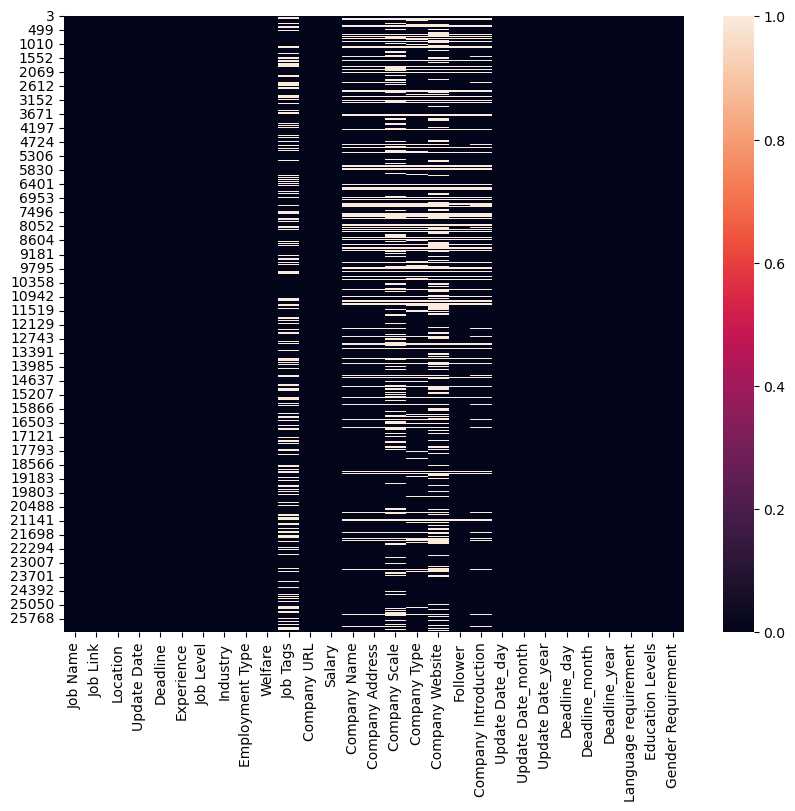

In [31]:
# Biểu đồ heatmap cho các giá trị 'Not specified'
plt.subplots(figsize=(10,8))
sns.heatmap(data.isin(['Not specified']))

Nhận thấy có quá nhiều giá trị Not specified ở các cột Job Tags, Company Address, Company Scale, Company Website, Company Introduction, Followers

In [32]:
# Tiến hành loại bỏ 
data.drop("Job Tags", axis=1, inplace=True)
data.drop("Company Address", axis=1, inplace=True)
data.drop("Company Scale", axis=1, inplace=True)
data.drop("Company Website", axis=1, inplace=True)
data.drop("Company Introduction", axis=1, inplace=True)
data.drop("Follower", axis=1, inplace=True)

In [33]:
# In ra số lượng dòng mà cột Company Name có giá trị là Not specified trong khi cột Company Type không có giá trị là Not specified
print(data[(data['Company Name'] == 'Not specified') & (data['Company Type'] != 'Not specified')].shape[0])

# Tiến hành xóa các dòng đó
data = data[~((data['Company Name'] == 'Not specified') & (data['Company Type'] != 'Not specified'))]

# Ngược lại
print(data[(data['Company Name'] != 'Not specified') & (data['Company Type'] == 'Not specified')].shape[0])
data = data[~((data['Company Name'] != 'Not specified') & (data['Company Type'] == 'Not specified'))]

63
696


<Axes: >

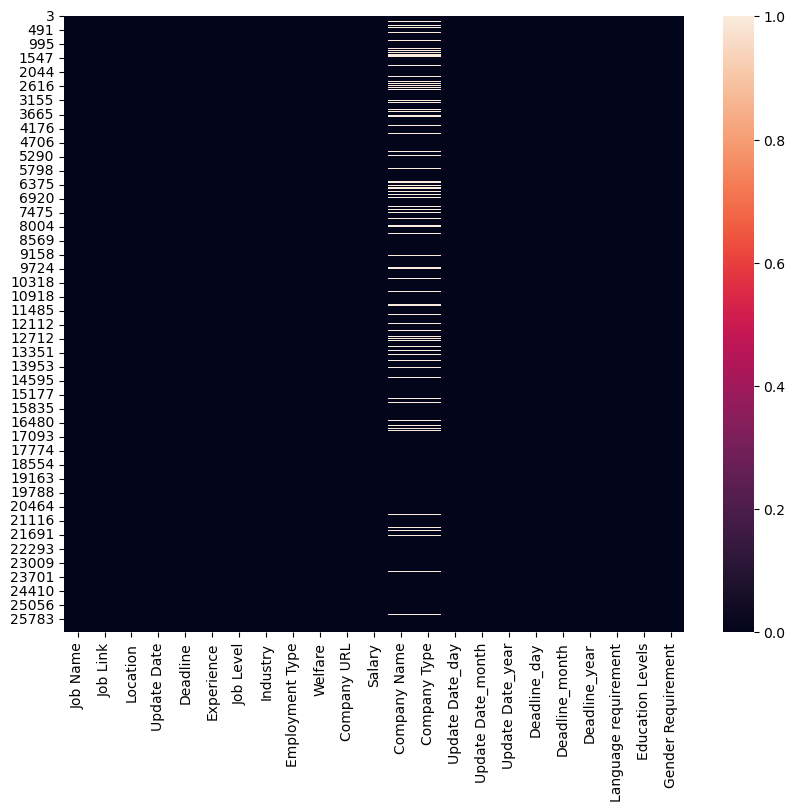

In [34]:
plt.subplots(figsize=(10,8))
sns.heatmap(data.isin(['Not specified']))

Giữ lại cột Company Name cho mục đích phân loại các công việc tuyển dụng thuộc và không thuộc bất kì một công ty nào

Thay các giá trị Not specified bằng giá trị 'Freelance recruiter', tạm gọi là Freelance recruiter vì đây là mẫu dữ liệu lấy từ các bài đăng tuyển dụng không thuộc về một công ty nào hết. Freelance recruiter là những người chuyên tìm kiếm và tuyển dụng các ứng viên mà bản thân họ không thuộc về bất kì một công ty nào.

In [35]:
# Thay các giá trị Not specified bằng giá trị 'Headhunters' trong cột Company Name
data['Company Name'] = data['Company Name'].replace('Not specified', 'Freelance recruiter')

In [36]:
data.shape

(18990, 23)

## VI. Lưu dữ liệu <a id="vi"></a>

In [37]:
data['Industry'] = data['Industry'].astype(str)
data['Industry'] = data['Industry'].str.replace(r'\s+', '', regex=True) # Phục vụ cho việc định dạng khi xuất file csv

In [38]:
# Lưu dữ liệu vào file csv
data.to_csv('data_for_visual.csv', index=False, encoding='utf-8-sig')